In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import time

from citipy import citipy
from config import weather_api_key
from datetime import datetime
from scipy.stats import linregressess

In [19]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
today = time.time()

In [3]:
lats = np.random.uniform(-90,90,size=1500)
lngs = np.random.uniform(-180,180,size=1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [4]:
coordinates = list(lat_lngs)

In [5]:
coordinates

[(-39.39167417980393, -87.54637259729209),
 (48.069107086533734, 129.16200319720394),
 (66.73515135959522, -52.467612290581826),
 (-57.40909255327121, -160.22693409852528),
 (-85.37891275383329, 95.5976862017904),
 (-24.698139950406556, 11.622850040217003),
 (85.12170439361907, -7.706100872790529),
 (-61.33364826278628, -23.929912383011754),
 (-0.5550641340523725, -3.414115165096291),
 (-2.1163192462433926, 159.8664258270556),
 (6.731793443315439, 14.859829072222027),
 (23.943771472521547, 39.483032143778075),
 (19.392902802527715, -11.463736495598312),
 (-30.77165736893008, -166.91810994472655),
 (-69.58906885365685, 96.73295291198804),
 (88.62293046095553, -12.813797914987134),
 (-14.914107328878643, -164.94249423372042),
 (80.38815185940283, -111.89448168670559),
 (-11.624938851387128, -146.9355139748318),
 (76.61443028693088, 107.37210670017527),
 (-43.68986673311175, 98.8650167844894),
 (-73.54578811941255, 17.69199652249077),
 (63.041301374237264, -65.42923091169534),
 (88.152157

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

622

In [7]:
cities

['ancud',
 'xinqing',
 'sisimiut',
 'mataura',
 'albany',
 'walvis bay',
 'illoqqortoormiut',
 'chuy',
 'axim',
 'kieta',
 'meiganga',
 'jiddah',
 'atar',
 'avarua',
 'busselton',
 'alofi',
 'yellowknife',
 'tiarei',
 'khatanga',
 'bredasdorp',
 'pangnirtung',
 'amderma',
 'kuala terengganu',
 'necochea',
 'merauke',
 'port-cartier',
 'general pico',
 'kurilsk',
 'hermanus',
 'farrukhabad',
 'sitka',
 'kolvereid',
 'morehead',
 'ushuaia',
 'castro',
 'montalvo',
 'atuona',
 'batagay',
 'georgetown',
 'viligili',
 'pisco',
 'samalaeulu',
 'rikitea',
 'te anau',
 'itarema',
 'tasiilaq',
 'kislovodsk',
 'wanning',
 'kahului',
 'cape town',
 'harvard',
 'changji',
 'belaya gora',
 'mao',
 'guerrero negro',
 'puerto baquerizo moreno',
 'saskylakh',
 'gimli',
 'mount isa',
 'kapaa',
 'mys shmidta',
 'roald',
 'nikolskoye',
 'punta arenas',
 'vaini',
 'lompoc',
 'hithadhoo',
 'tupik',
 'kruisfontein',
 'lokosovo',
 'taltal',
 'chokurdakh',
 'minbu',
 'chicama',
 'nevelsk',
 'comodoro rivadavi

In [9]:
city_data = []

print("Beginning Data Retrieval     ")
print("-----------------------------")

record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [10]:
for i, city in enumerate(cities):
    if(i % 50 == 0 and i>=50):
        set_count += 1
        record_count = 1
    city_url = f"{url}&q={cities[i].replace(' ','+')}"
    
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    record_count += 1
    
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | ancud
Processing Record 2 of Set 1 | xinqing
Processing Record 3 of Set 1 | sisimiut
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | walvis bay
Processing Record 7 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 8 of Set 1 | chuy
Processing Record 9 of Set 1 | axim
Processing Record 10 of Set 1 | kieta
Processing Record 11 of Set 1 | meiganga
Processing Record 12 of Set 1 | jiddah
City not found. Skipping...
Processing Record 13 of Set 1 | atar
Processing Record 14 of Set 1 | avarua
Processing Record 15 of Set 1 | busselton
Processing Record 16 of Set 1 | alofi
Processing Record 17 of Set 1 | yellowknife
Processing Record 18 of Set 1 | tiarei
Processing Record 19 of Set 1 | khatanga
Processing Record 20 of Set 1 | bredasdorp
Processing Record 21 of Set 1 | pangnirtung
Processing Record 22 of Set 1 | amderma
City not found. Skipping...
Processing Record 23 of Set 1 | kual

Processing Record 44 of Set 4 | puerto ayacucho
Processing Record 45 of Set 4 | aklavik
Processing Record 46 of Set 4 | gonzalez
Processing Record 47 of Set 4 | deputatskiy
Processing Record 48 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 49 of Set 4 | karakendzha
City not found. Skipping...
Processing Record 50 of Set 4 | dzerzhinskoye
Processing Record 1 of Set 5 | shizunai
Processing Record 2 of Set 5 | biak
Processing Record 3 of Set 5 | sao filipe
Processing Record 4 of Set 5 | naberera
Processing Record 5 of Set 5 | sug-aksy
City not found. Skipping...
Processing Record 6 of Set 5 | thompson
Processing Record 7 of Set 5 | tommot
Processing Record 8 of Set 5 | baisha
Processing Record 9 of Set 5 | bongandanga
Processing Record 10 of Set 5 | weiswampach
Processing Record 11 of Set 5 | nurota
Processing Record 12 of Set 5 | road town
Processing Record 13 of Set 5 | marv dasht
City not found. Skipping...
Processing Record 14 of Set 5 | buon me thuot
City not

Processing Record 29 of Set 8 | katubao
Processing Record 30 of Set 8 | coruripe
Processing Record 31 of Set 8 | lebedinyy
Processing Record 32 of Set 8 | oga
Processing Record 33 of Set 8 | ustynivka
Processing Record 34 of Set 8 | obo
Processing Record 35 of Set 8 | alyangula
Processing Record 36 of Set 8 | jaru
Processing Record 37 of Set 8 | baykit
Processing Record 38 of Set 8 | nanzhang
Processing Record 39 of Set 8 | wajima
Processing Record 40 of Set 8 | port-gentil
Processing Record 41 of Set 8 | morrope
Processing Record 42 of Set 8 | espanola
Processing Record 43 of Set 8 | corning
Processing Record 44 of Set 8 | tallahassee
Processing Record 45 of Set 8 | champerico
Processing Record 46 of Set 8 | sorland
Processing Record 47 of Set 8 | el rosario
Processing Record 48 of Set 8 | pontes e lacerda
Processing Record 49 of Set 8 | hirara
Processing Record 50 of Set 8 | markova
Processing Record 1 of Set 9 | saldanha
Processing Record 2 of Set 9 | awbari
Processing Record 3 of S

Processing Record 22 of Set 12 | livani
Processing Record 23 of Set 12 | usoke
Processing Record 24 of Set 12 | karavukovo
Processing Record 25 of Set 12 | porto walter
Processing Record 26 of Set 12 | svetlogorsk
Processing Record 27 of Set 12 | ambilobe
Processing Record 28 of Set 12 | balkhash
Processing Record 29 of Set 12 | bako
Processing Record 30 of Set 12 | artvin
Processing Record 31 of Set 12 | suluq
Processing Record 32 of Set 12 | zemio
Processing Record 33 of Set 12 | maniitsoq
Processing Record 34 of Set 12 | san rafael
Processing Record 35 of Set 12 | abbeyfeale
Processing Record 36 of Set 12 | san jeronimo
Processing Record 37 of Set 12 | ballina
Processing Record 38 of Set 12 | dicabisagan
Processing Record 39 of Set 12 | mbalmayo
Processing Record 40 of Set 12 | isabela
Processing Record 41 of Set 12 | lulea
Processing Record 42 of Set 12 | san juan
Processing Record 43 of Set 12 | whitehorse
Processing Record 44 of Set 12 | puerto quijarro
Processing Record 45 of Se

In [11]:
len(city_data)

581

In [12]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ancud,-41.8697,-73.8203,57.99,82,75,2.30,CL,2021-04-25 21:07:14
1,Xinqing,48.2333,129.5000,34.16,48,100,3.15,CN,2021-04-25 21:10:45
2,Sisimiut,66.9395,-53.6735,40.01,76,98,4.43,GL,2021-04-25 21:07:27
3,Mataura,-46.1927,168.8643,46.00,80,66,13.00,NZ,2021-04-25 21:07:33
4,Albany,42.6001,-73.9662,57.99,47,88,1.99,US,2021-04-25 21:10:31


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [14]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ancud,CL,2021-04-25 21:07:14,-41.8697,-73.8203,57.99,82,75,2.30
1,Xinqing,CN,2021-04-25 21:10:45,48.2333,129.5000,34.16,48,100,3.15
2,Sisimiut,GL,2021-04-25 21:07:27,66.9395,-53.6735,40.01,76,98,4.43
3,Mataura,NZ,2021-04-25 21:07:33,-46.1927,168.8643,46.00,80,66,13.00
4,Albany,US,2021-04-25 21:10:31,42.6001,-73.9662,57.99,47,88,1.99
5,Walvis Bay,NA,2021-04-25 21:06:00,-22.9575,14.5053,62.01,82,15,3.44
6,Chuy,UY,2021-04-25 21:10:47,-33.6971,-53.4616,62.65,80,98,13.85
7,Axim,GH,2021-04-25 21:10:48,4.8699,-2.2405,80.65,82,99,5.88
8,Kieta,PG,2021-04-25 21:10:48,-6.2167,155.6333,80.40,74,81,1.48
9,Meiganga,CM,2021-04-25 21:10:48,6.5167,14.3000,66.15,84,91,3.13


In [15]:
output_data_file = "weather_data/cities.csv"
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [21]:
today = time.strftime("%x")
today

'04/25/21'

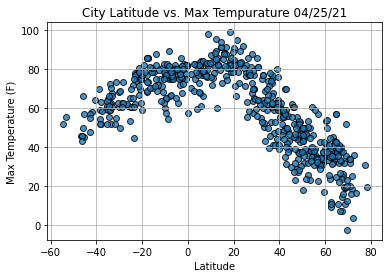

In [23]:
plt.scatter(lats,
            max_temps,
            edgecolor="black",
            linewidths=1,
            marker="o",
            alpha=0.8,
            label="Cities")
plt.title(f"City Latitude vs. Max Tempurature {today}")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("weather_data/Fig1.png")
plt.show()

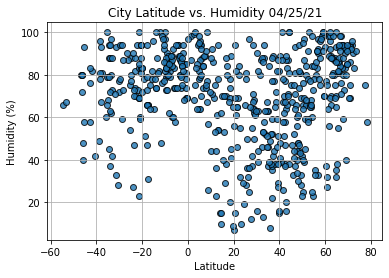

In [25]:
plt.scatter(lats,
            humidity,
            edgecolor="black",
            linewidths=1,
            marker="o",
            alpha=0.8,
            label="Cities")
plt.title(f"City Latitude vs. Humidity {today}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("weather_data/Fig2.png")
plt.show()

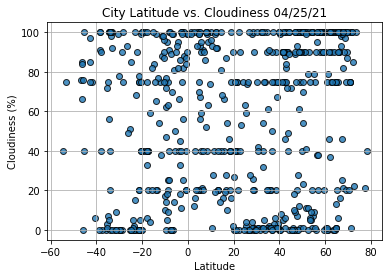

In [26]:
plt.scatter(lats,
            cloudiness,
            edgecolor="black",
            linewidths=1,
            marker="o",
            alpha=0.8,
            label="Cities")
plt.title(f"City Latitude vs. Cloudiness {today}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("weather_data/Fig3.png")
plt.show()

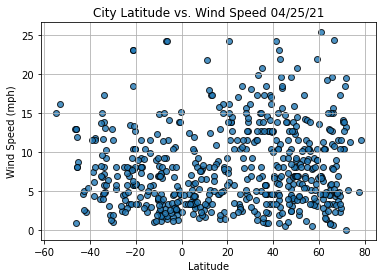

In [27]:
plt.scatter(lats,
            wind_speed,
            edgecolor="black",
            linewidths=1,
            marker="o",
            alpha=0.8,
            label="Cities")
plt.title(f"City Latitude vs. Wind Speed {today}")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("weather_data/Fig4.png")
plt.show()

In [52]:
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [53]:
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

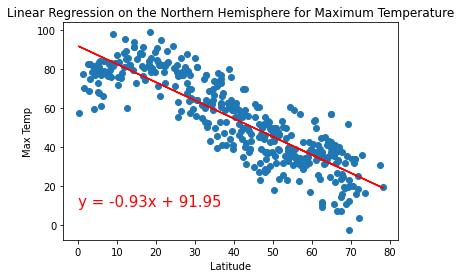

In [55]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(0,10))

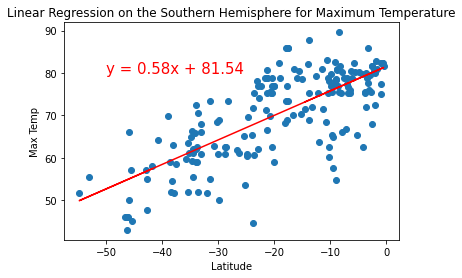

In [58]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,80))

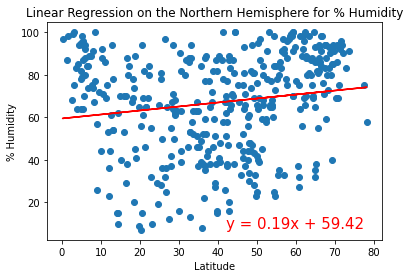

In [66]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(42,8))

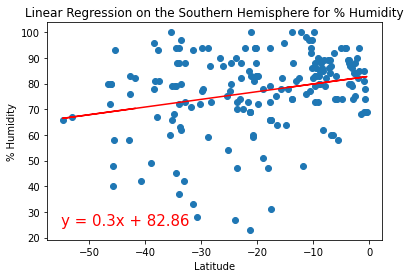

In [65]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-55,25))

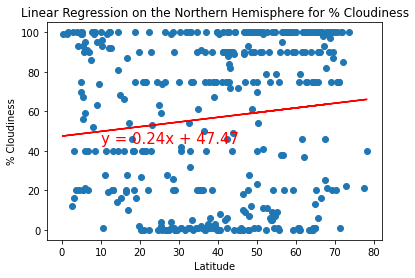

In [70]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(10,44))

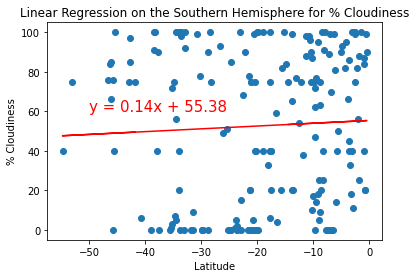

In [72]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

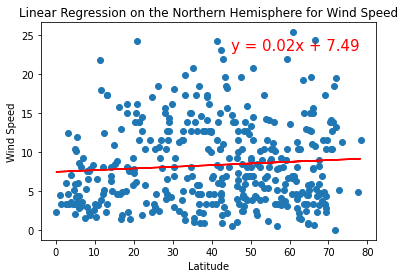

In [76]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(45,23))

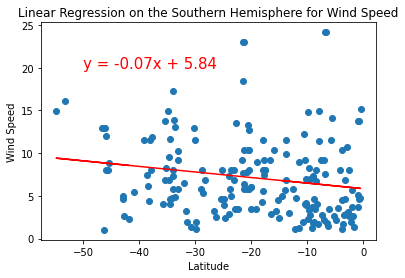

In [79]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,20))